<a href="https://colab.research.google.com/github/kabeerbora/1980s_delin/blob/main/1980s_delicensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages

In [2]:
import pandas as pd
!pip install pyreadstat

# Data ETL

In [3]:
%%time
import pandas as pd
import pyreadstat
import os

from google.colab import drive
drive.mount('/content/drive')

folder_range = range(1976, 1983)
folder_range_1 = range(1983, 1989)
# Create an empty dictionary to store DataFrames
dfs = []
for year in folder_range:
    folder_name = f"{year}_{year+1}"
    folder_path = f"/content/drive/MyDrive/data_economics_research/ASI_Firms/{folder_name}"
    if os.path.exists(folder_path):  # checking if path exits or not
        for filename in os.listdir(folder_path):
            if filename.endswith(".sav") and (filename.startswith("ASI") or filename.startswith("ASISUM")):
                file_path = os.path.join(folder_path, filename)
                df, meta = pyreadstat.read_sav(file_path, apply_value_formats=True)
                dfs.append(df)
for year in folder_range_1:
    folder_name = f"{year}_{year+1}"
    folder_path = f"/content/drive/MyDrive/data_economics_research/ASI_Firms/{folder_name}"
    if os.path.exists(folder_path):  # checking if path exits or not
        for filename in os.listdir(folder_path):
            if filename.endswith(".sav") and (filename.startswith("ASI") or filename.startswith("ASISUM")):
                file_path = os.path.join(folder_path, filename)
                df, meta = pyreadstat.read_sav(file_path, apply_value_formats=True)
                dfs.append(df)
df_final = pd.concat(dfs).reset_index(drop=True)
df_final
# df_1 = dfs['ASISUM_7677']
# df_2 = dfs['ASISUM_7778']
# df_3 = dfs['ASISUM_7980']
# df_4 = dfs['ASISUM_8081']
# df_5 = dfs['ASISUM_8182']
# df_6 = dfs['ASISUM_8586']
# df_7 = dfs['ASI_Summary_86_87']
# df_8 = dfs['ASI_Summary_87_88']
# df_9 = dfs['ASI_Summary_88_89']

Mounted at /content/drive
CPU times: user 24 s, sys: 2.42 s, total: 26.4 s
Wall time: 46.1 s


,Part_CD,Itm2,State,S_No,IND_CD,WGT,Itm12,Itm14,Itm15,Itm16,...,Itm104,Itm105,Itm106,Itm107,Itm108,Itm33a,Itm109,MSchm_CD,Itm34a,Itm10
0,Delhi,3,RAJASTHAN,7.0,2010.0,1.0,1976-77,0,703.0,Wholly State and/or Local Government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Delhi,3,RAJASTHAN,10.0,2010.0,1.0,1976-77,0,703.0,Joint Sector Private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Delhi,3,RAJASTHAN,90035.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Delhi,3,RAJASTHAN,90034.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Delhi,3,RAJASTHAN,90055.0,2041.0,2.0,1976-77,0,801.0,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660756,Delhi,NaN,DAMAN & DIU,15012.0,9730.0,NaN,1988-89,26.0,12.0,Wholly private Ownership,...,0.0,0.0,0.0,0.0,9500.0,NaN,NaN,NaN,NaN,9740.0
660757,Delhi,NaN,DAMAN & DIU,15032.0,9740.0,NaN,1988-89,26.0,12.0,Wholly State and/or Local Government,...,0.0,0.0,0.0,0.0,15320.0,NaN,NaN,NaN,NaN,9740.0
660758,Delhi,NaN,DAMAN & DIU,14906.0,9740.0,NaN,1988-89,26.0,12.0,Wholly private Ownership,...,0.0,0.0,0.0,0.0,3085.0,NaN,NaN,NaN,NaN,9740.0
660759,Delhi,NaN,DAMAN & DIU,14933.0,9740.0,NaN,1988-89,26.0,12.0,Wholly private Ownership,...,0.0,0.0,0.0,0.0,1200.0,NaN,NaN,NaN,NaN,9740.0


## Applying meta labels to columns

In [85]:
column_labels = meta.column_names_to_labels
df_final.columns = [column_labels.get(col, col) for col in df_final.columns]
df_final.head(5)
df_final['nic_code'] = df_final['NIC-70(1) Original NIC70'].astype(str).str[:3]
df_final['year'] = df_final['Year of Survey'].astype(str).str[:4]
df_final = df_final.drop(columns=['NIC-70(1) Original NIC70', 'Year of Survey'])
df_final

,Part Code,Itm2,State Code,Running Serial No,WGT,Dummy State Code,Region Code,Ownership Code,Organisation Code,Management Code,...,Quantity of Electricity Sold (K.W.H.),Quantity of Electricity Consumed (K.W.H.),Itm33a,Itm109,MSchm_CD,Itm34a,NIC87,delin_sector,nic_code,year
0,Delhi,3,RAJASTHAN,7.0,1.0,0,703.0,Wholly State and/or Local Government,Partnership : Others,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,201,1976
1,Delhi,3,RAJASTHAN,10.0,1.0,0,703.0,Joint Sector Private,Public Corporations,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,201,1976
2,Delhi,3,RAJASTHAN,90035.0,2.0,0,801.0,NR,NR,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,204,1976
3,Delhi,3,RAJASTHAN,90034.0,2.0,0,801.0,NR,NR,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,204,1976
4,Delhi,3,RAJASTHAN,90055.0,2.0,0,801.0,NR,NR,NR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,204,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660756,Delhi,NaN,DAMAN & DIU,15012.0,NaN,26.0,12.0,Wholly private Ownership,Partnership : Others,Others,...,0.0,9500.0,NaN,NaN,NaN,NaN,9740.0,0,973,1988
660757,Delhi,NaN,DAMAN & DIU,15032.0,NaN,26.0,12.0,Wholly State and/or Local Government,Public Corporation by special Act of Parliamen...,Private enterprise whose management has been t...,...,0.0,15320.0,NaN,NaN,NaN,NaN,9740.0,0,974,1988
660758,Delhi,NaN,DAMAN & DIU,14906.0,NaN,26.0,12.0,Wholly private Ownership,Private Limited Company,Others,...,0.0,3085.0,NaN,NaN,NaN,NaN,9740.0,0,974,1988
660759,Delhi,NaN,DAMAN & DIU,14933.0,NaN,26.0,12.0,Wholly private Ownership,Partnership : Others,Others,...,0.0,1200.0,NaN,NaN,NaN,NaN,9740.0,0,974,1988


## Finding zeroes and NANs, and checking for number of observations by year

In [5]:
for column in df_final.columns:
    zero_count = df_final[column][(df_final[column] == 0) | (df_final[column].isnull())].count()
    print(f"Column '{column}': {zero_count} zeros and NaNs")

#Variable count by year
def count_zeros_nans(series):
  """Counts zeros and NaNs in a pandas Series."""
  num_zeros = (series == 0).sum()
  num_nans = series.isnull().sum()
  return num_zeros + num_nans

# Calculate and print the counts
gross_sale_zeros_nans_by_year = df_final.groupby('Year of Survey')['Total Output'].agg(count_zeros_nans).reset_index()
district_code_zeros_nans_by_year = df_final.groupby('Year of Survey')['District Code'].agg(count_zeros_nans).reset_index()
wages_workers_zeros_nans_by_year = df_final.groupby('Year of Survey')['Wages to Workers  (Including Bonus to Workers)'].agg(count_zeros_nans).reset_index()
value_added_zeros_nans_by_year = df_final.groupby('Year of Survey')['Fixed Capital ( Closing )'].agg(count_zeros_nans).reset_index()
surplus_value_zeros_nans_by_year = df_new.groupby('year')['rop'].agg(count_zeros_nans).reset_index()

print(surplus_value_zeros_nans_by_year)

Column 'Part Code': 0 zeros and NaNs
Column 'Itm2': 0 zeros and NaNs
Column 'State Code': 0 zeros and NaNs
Column 'Running Serial No': 5 zeros and NaNs
Column 'NIC-70(1) Original NIC70': 0 zeros and NaNs
Column 'WGT': 399 zeros and NaNs
Column 'Year of Survey': 0 zeros and NaNs
Column 'Dummy  State  Code': 50871 zeros and NaNs
Column 'Region Code': 55506 zeros and NaNs
Column 'Ownership Code': 0 zeros and NaNs
Column 'Organisation Code': 0 zeros and NaNs
Column 'Management Code': 0 zeros and NaNs
Column 'Scheme Code': 0 zeros and NaNs
Column 'District Code': 0 zeros and NaNs
Column 'Block Code': 428217 zeros and NaNs
Column 'Serial No. as given in Schedules': 0 zeros and NaNs
Column 'Permanent Serial No': 4 zeros and NaNs
Column 'Location Code': 0 zeros and NaNs
Column 'Area Code': 0 zeros and NaNs
Column 'Year of Initial Production': 28773 zeros and NaNs
Column 'Year of Initial Production Code': 0 zeros and NaNs
Column 'Open-Close Code': 0 zeros and NaNs
Column 'Power Code': 0 zeros a

NameError: name 'df_new' is not defined

In [133]:
observations_by_year = df_new.groupby('year').size().reset_index(name='Number of Observations')
observations_by_year = df_new.groupby(['year', 'delin_sector'])['delin_sector'].size().reset_index(name='Number of Observations')
observations_by_year

,year,delin_sector,Number of Observations
0,1980,0,15004
1,1980,1,6892
2,1981,0,15814
3,1981,1,7078
4,1982,0,16706
5,1982,1,7554
6,1983,0,15594
7,1983,1,7321
8,1984,0,16059
9,1984,1,7459


In [135]:
import altair as alt


chart = alt.Chart(observations_by_year).mark_line().encode(
    x='year',
    y='Number of Observations',
    color='delin_sector:N'
)
chart

alt.Chart(...)

# Creating variables

In [120]:
df_new = df_final[['Year of Survey', 'District Code', 'State Code', 'Total Output', 'Ownership Code', 'Wages to Workers  (Including Bonus to Workers)', 'No. of Factories', 'Value Added', 'Fixed Capital ( Closing )', 'NIC-70(1) Original NIC70']].copy()
df_new = df_new.dropna(subset=['Total Output', 'Wages to Workers  (Including Bonus to Workers)', 'Value Added', 'Fixed Capital ( Closing )'])
df_new = df_new[(df_new['Total Output'] != 0) & (df_new['Wages to Workers  (Including Bonus to Workers)'] != 0) & (df_new['Value Added'] != 0) & (df_new['Fixed Capital ( Closing )'] != 0)]
df_new['surplus_value'] = df_new['Value Added'] - df_new['Wages to Workers  (Including Bonus to Workers)']
df_new['rop'] = df_new['surplus_value']/df_new['Fixed Capital ( Closing )']
df_new = df_new[(df_new['rop'] > 0) & (df_new['rop'] < 1)]
df_new['rop'].describe()
df_final = df_final[(df_final['Total Output'] != 0) & (df_final['Wages to Workers  (Including Bonus to Workers)'] != 0) & (df_final['Value Added'] != 0) & (df_final['Fixed Capital ( Closing )'] != 0) & (df_final['Mandays Employees'] != 0)]
df_final['wage_worker'] = df_final['Wages to Workers  (Including Bonus to Workers)']/df_final['Mandays Employees']
df_new = df_new[df_new['surplus_value'] > 0]
df_new = df_new.rename(columns={'No. of Factories' : 'no_fact','Ownership Code' : 'ownership', 'Wages to Workers  (Including Bonus to Workers)': 'wages_workers', 'NIC-70(1) Original NIC70': 'nic_code', 'Fixed Capital ( Closing )': 'fixed_k', 'Year of Survey': 'year', 'District Code': 'district', 'State Code':'state', 'Total Output':'output'})
df_new['nic_code'] = df_new['nic_code'].astype(str).str[:3]

,wage_worker
count,477151.000000
mean,19.681996
std,314.284388
min,-37.852097
25%,9.322875
50%,13.961231
75%,20.737064
max,197049.714286


## Addressing 'year'

In [104]:
df_new['year'] = df_new['year'].astype(str).str[:4]
df_new['year'] = df_new['year'].astype(int)
df_final['year'] = df_final['year'].astype(int)
df_final = df_final[df_final['year'] >= 1979]
df_new = df_new[df_new['year'] >= 1979]
df_final

,Part Code,Itm2,State Code,Running Serial No,WGT,Dummy State Code,Region Code,Ownership Code,Organisation Code,Management Code,...,Quantity of Electricity Sold (K.W.H.),Quantity of Electricity Consumed (K.W.H.),Itm33a,Itm109,MSchm_CD,Itm34a,NIC87,delin_sector,nic_code,year
101381,Delhi,NaN,RAJASTHAN,285.0,1.0,17.0,705.0,Wholly Private Enterprise,Co-Operative Society,Others,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,201,1979
101382,Delhi,NaN,RAJASTHAN,229.0,2.0,17.0,302.0,Wholly State and/or Local Government,Public Limited Company,Others,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,201,1979
101383,Delhi,NaN,RAJASTHAN,292.0,1.0,17.0,807.0,Wholly Private Enterprise,Partnership : Others,Others,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,201,1979
101384,Delhi,NaN,RAJASTHAN,161.0,1.0,17.0,606.0,Wholly State and/or Local Government,Public Corporations,Others,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,201,1979
101385,Delhi,NaN,RAJASTHAN,264.0,1.0,17.0,705.0,Wholly Private Enterprise,Co-Operative Society,Others,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,201,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660756,Delhi,NaN,DAMAN & DIU,15012.0,NaN,26.0,12.0,Wholly private Ownership,Partnership : Others,Others,...,0.0,9500.0,NaN,NaN,NaN,NaN,9740.0,0,973,1988
660757,Delhi,NaN,DAMAN & DIU,15032.0,NaN,26.0,12.0,Wholly State and/or Local Government,Public Corporation by special Act of Parliamen...,Private enterprise whose management has been t...,...,0.0,15320.0,NaN,NaN,NaN,NaN,9740.0,0,974,1988
660758,Delhi,NaN,DAMAN & DIU,14906.0,NaN,26.0,12.0,Wholly private Ownership,Private Limited Company,Others,...,0.0,3085.0,NaN,NaN,NaN,NaN,9740.0,0,974,1988
660759,Delhi,NaN,DAMAN & DIU,14933.0,NaN,26.0,12.0,Wholly private Ownership,Partnership : Others,Others,...,0.0,1200.0,NaN,NaN,NaN,NaN,9740.0,0,974,1988


# Assigning treatment

In [89]:
delin_sector = [274, 269, 268, 267, 266, 265, 264, 262, 261, 260, 259, 258, 257, 254, 250, 248, 247, 246, 245, 243, 242, 241, 240, 236, 235, 234, 233, 232, 231, 230, 224, 218, 216, 215, 214, 213, 209, 208, 205, 201, 200, 389, 387, 386, 385, 384, 383, 382, 381, 379, 378, 372, 370, 362, 361, 349, 345, 340, 336, 335, 334, 333, 332, 329, 326, 325, 324, 317, 311, 303, 301, 296, 295, 291, 288, 287, 284, 279, 277, 276, 275]
df_new['delin_sector'] = 0
df_final['delin_sector'] = 0
df_new.loc[df_new['nic_code'].isin(map(str, delin_sector)), 'delin_sector'] = 1
df_final.loc[df_final['nic_code'].isin(map(str, delin_sector)), 'delin_sector'] = 1

In [122]:
average_rop_by_delin_sector_year = df_new.groupby(['year', 'delin_sector'])['rop'].mean().unstack()
total_fact_by_delin_sector_year = df_final.groupby(['year', 'delin_sector'])['No. of Factories'].sum().unstack()
wage_worker_by_delin_sector_year = df_final.groupby(['year', 'delin_sector'])['wage_worker'].mean().unstack()
average_rop_by_delin_sector_year
total_fact_by_delin_sector_year
wage_worker_by_delin_sector_year

delin_sector,0,1
year,,
1979,12.608098,12.069466
1980,18.993038,12.093410
1981,15.566116,15.569459
1982,16.015624,15.982564
1983,16.063362,16.638363
1984,20.292824,18.984637
1985,25.152169,25.665336
1986,22.842046,22.388305
1987,26.633565,22.870867


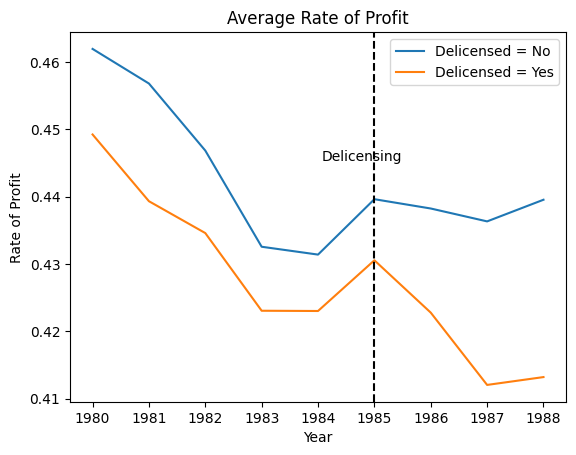

In [94]:
import matplotlib.pyplot as plt
plt.plot(average_rop_by_delin_sector_year.index, average_rop_by_delin_sector_year[0], label='Delicensed = No')
plt.plot(average_rop_by_delin_sector_year.index, average_rop_by_delin_sector_year[1], label='Delicensed = Yes')
plt.xlabel('Year')
plt.ylabel('Rate of Profit')
plt.title('Average Rate of Profit')
plt.legend()

# Add vertical line at year 1985
plt.axvline(x=1985, color='black', linestyle='--', label='delicensing')
plt.text(1985.5, 0.446, 'Delicensing', rotation=360, ha='right', va='center')
plt.show()

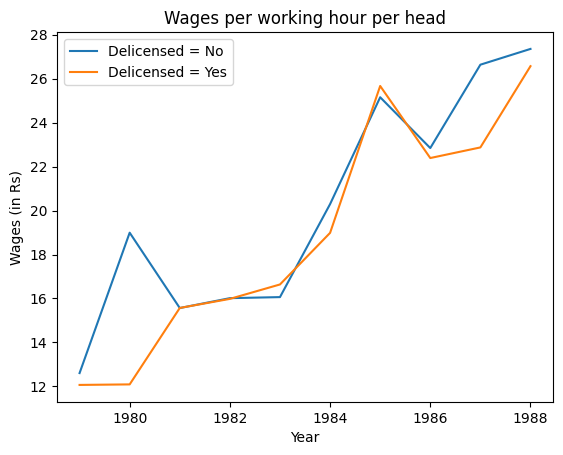

In [126]:
plt.plot(wage_worker_by_delin_sector_year.index, wage_worker_by_delin_sector_year[0], label='Delicensed = No')
plt.plot(wage_worker_by_delin_sector_year.index, wage_worker_by_delin_sector_year[1], label='Delicensed = Yes')
plt.xlabel('Year')
plt.ylabel('Wages (in Rs)')
plt.title('Wages per working hour per head')
plt.legend()

# Add vertical line at year 1985
# plt.axvline(x=1985, color='black', linestyle='--', label='delicensing')
# plt.text(1985, 50000, 'Delicensing', rotation=0, ha='right', va='center')
plt.show()